In [1]:
organisms = [
    {
        'org': 'E.Coli',
        'name': 'E.Coli'
    },
    {
        'org': 'Drosophila.Melanogaster',
        'name': 'Fruchtfliege'
    },
    {
        'org': 'Homo.Sapiens',
        'name': 'Mensch'
    }
]
    

organism = organisms[2]['org']
organism_name = organisms[2]['name']

In [2]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../scripts')
import ml_helper as mlh
import ml_evaluation as mle
import encoder as e
import Classifier as Classifier

In [3]:
e.set_organism(organism)

Länge train_dataset: 33040
Länge valid_dataset: 4073
Länge test df: 2168


In [5]:
class PositionalEncoding(e.PositionalEncoding):
    pass

class EncoderClassifier(e.EncoderClassifier):
    pass

In [6]:
true_codons, pred_codons_replaced = e.eval_best_model()

Model loaded: 20240603163741_encoder_64em_4l_4h_posenc_02dr_50ep.pt
Model used max bias codon for 78.75% of possible codon predictions
Replaced 0.00% of codons


In [ ]:
# Remove Padding
predictions = []
for codon_seq in pred_codons_replaced:
    predictions.append([codon for codon in codon_seq if codon != ''])

# Flatten    
predicted, labels = mle.flatten_for_plotting(predictions, true_codons, filter_pads=False)

# Translate to integers
predicted_int = []
for codon in predicted:
    predicted_int.append(mlh.codons_to_integer[codon])

labels_int = []
for codon in labels:
    labels_int.append(mlh.codons_to_integer[codon])

In [8]:
mle.get_unique_pred_classes(predicted, labels)

predicted different classes:  39 out of: 61
predicted following classes:  {'CAT', 'GGT', 'TCT', 'ACC', 'GAA', 'ACA', 'CAA', 'ATG', 'GAT', 'CGT', 'TTC', 'GTT', 'CTG', 'GAC', 'TGC', 'TCA', 'AAC', 'AGC', 'GCG', 'TTT', 'TTA', 'AAA', 'TGT', 'CCG', 'ATC', 'CGC', 'CAC', 'GCA', 'CAG', 'TAC', 'TGG', 'TAT', 'GTG', 'GCT', 'AGA', 'CCA', 'AAT', 'ATT', 'GGC'}


({'AAA',
  'AAC',
  'AAT',
  'ACA',
  'ACC',
  'AGA',
  'AGC',
  'ATC',
  'ATG',
  'ATT',
  'CAA',
  'CAC',
  'CAG',
  'CAT',
  'CCA',
  'CCG',
  'CGC',
  'CGT',
  'CTG',
  'GAA',
  'GAC',
  'GAT',
  'GCA',
  'GCG',
  'GCT',
  'GGC',
  'GGT',
  'GTG',
  'GTT',
  'TAC',
  'TAT',
  'TCA',
  'TCT',
  'TGC',
  'TGG',
  'TGT',
  'TTA',
  'TTC',
  'TTT'},
 {'AAA',
  'AAC',
  'AAG',
  'AAT',
  'ACA',
  'ACC',
  'ACG',
  'ACT',
  'AGA',
  'AGC',
  'AGG',
  'AGT',
  'ATA',
  'ATC',
  'ATG',
  'ATT',
  'CAA',
  'CAC',
  'CAG',
  'CAT',
  'CCA',
  'CCC',
  'CCG',
  'CCT',
  'CGA',
  'CGC',
  'CGG',
  'CGT',
  'CTA',
  'CTC',
  'CTG',
  'CTT',
  'GAA',
  'GAC',
  'GAG',
  'GAT',
  'GCA',
  'GCC',
  'GCG',
  'GCT',
  'GGA',
  'GGC',
  'GGG',
  'GGT',
  'GTA',
  'GTC',
  'GTG',
  'GTT',
  'TAC',
  'TAT',
  'TCA',
  'TCC',
  'TCG',
  'TCT',
  'TGC',
  'TGG',
  'TGT',
  'TTA',
  'TTC',
  'TTG',
  'TTT'})

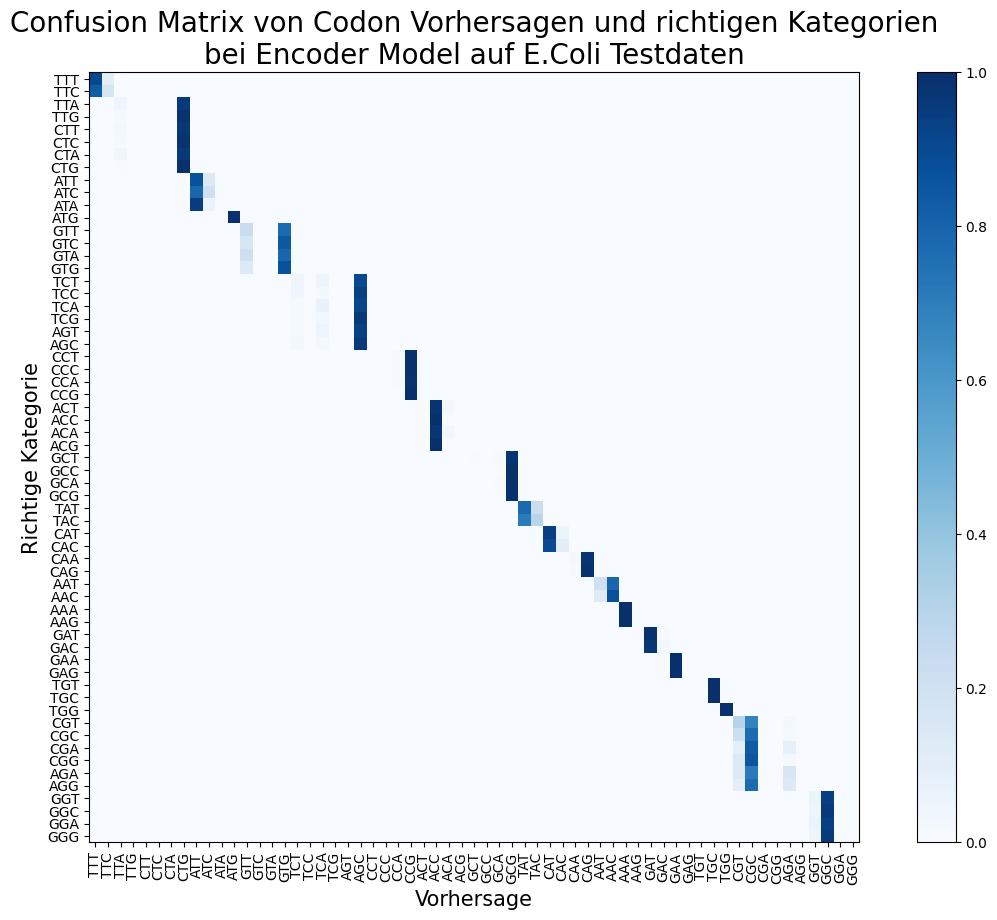

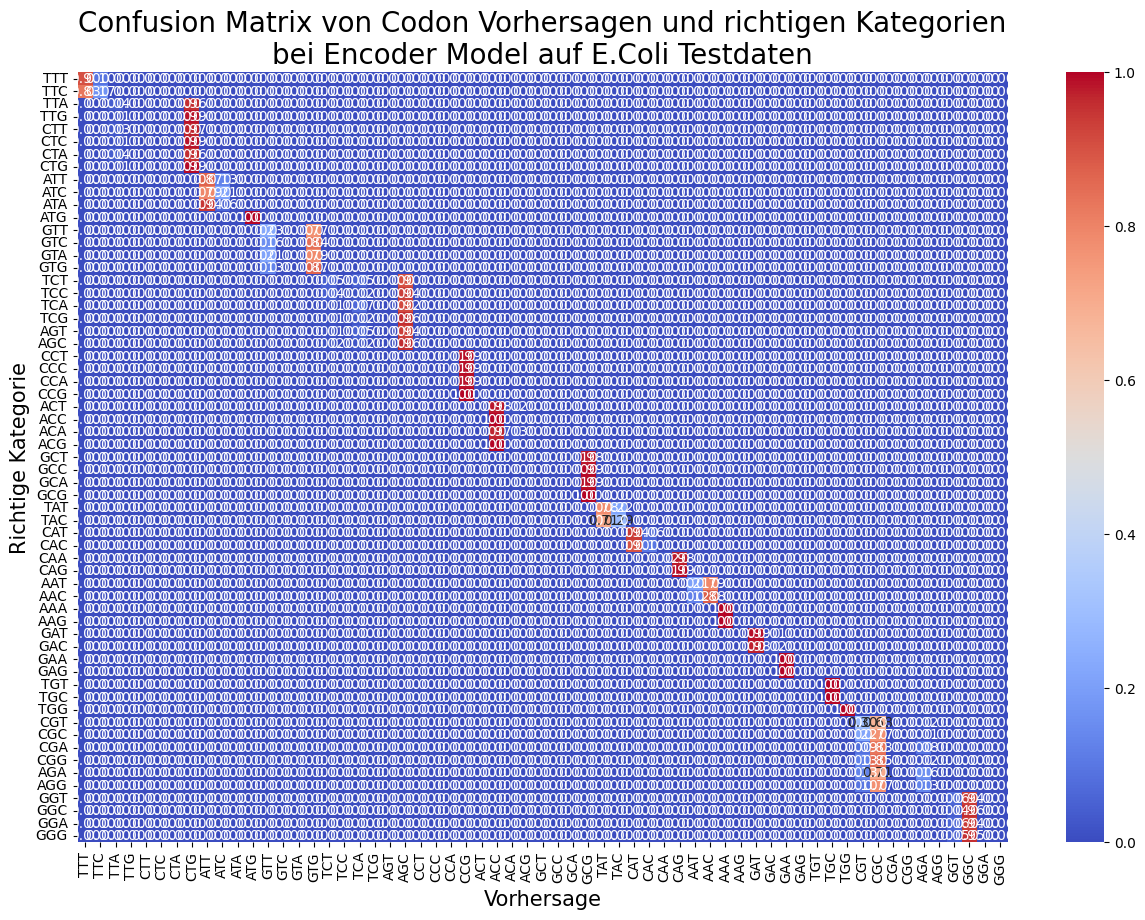

In [9]:
title = f'Confusion Matrix von Codon Vorhersagen und richtigen Kategorien\nbei Encoder Model auf {organism_name} Testdaten'

plt = mle.plot_confusion_matrix(labels_int, predicted_int, mlh.codons, title, sort_codons=True)
plt.show()
plt = mle.plot_confusion_matrix_sns(labels_int, predicted_int, mlh.codons, title, sort_codons=True)
plt.show()

In [10]:
predicted_aa =  mle.translate_codons(predicted)
labels_aa =  mle.translate_codons(labels)

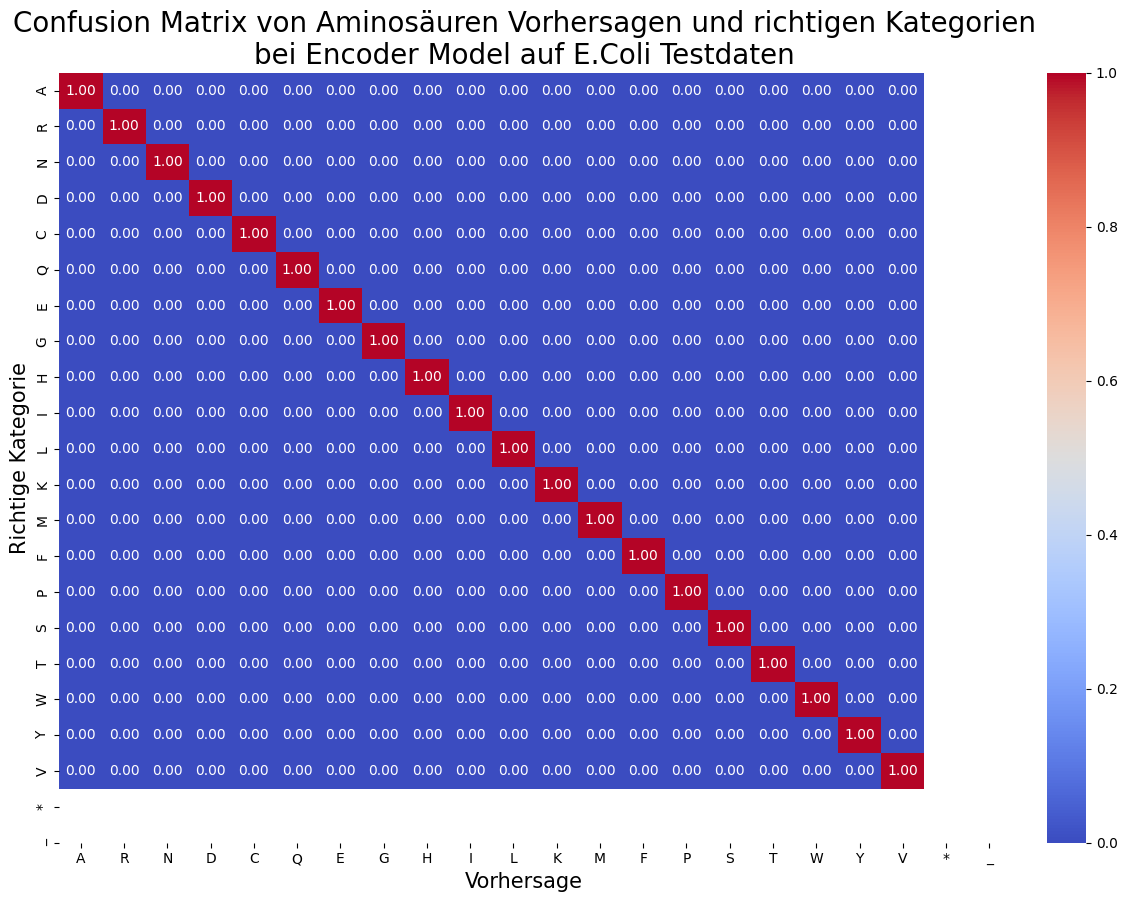

In [11]:
# Calculate confusion matrix for amino acids

plt = mle.plot_confusion_matrix_sns(labels_aa, predicted_aa, mlh.amino_acids, 
                                        f'Confusion Matrix von Aminosäuren Vorhersagen und richtigen Kategorien\nbei Encoder Model auf {organism_name} Testdaten')
plt.show()

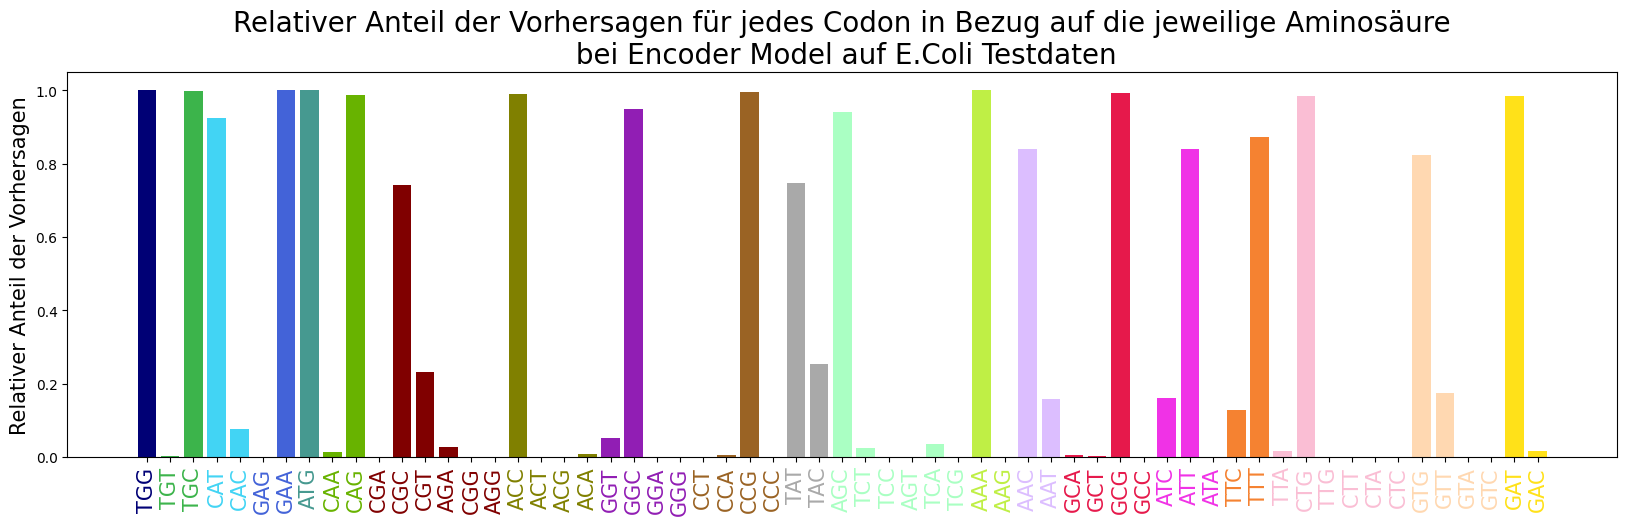

In [12]:
codon_counted_predicted = mle.codon_count(predicted_int, labels)

plt = mle.plot_relative_codon_count(codon_counted_predicted, predicted_int, f'Relativer Anteil der Vorhersagen für jedes Codon in Bezug auf die jeweilige Aminosäure\n bei Encoder Model auf {organism_name} Testdaten')

{'ATG': 3365, 'CGA': 0, 'CAT': 1472, 'CCT': 0, 'TTA': 69, 'GTG': 2670, 'GGT': 191, 'AAC': 2384, 'TGG': 1761, 'AAA': 4148, 'CTG': 6363, 'GGC': 3370, 'AGC': 1819, 'CGC': 1900, 'CAC': 113, 'GTT': 514, 'GAG': 0, 'TCT': 54, 'CGT': 783, 'GCA': 18, 'GCT': 8, 'TGT': 0, 'GCG': 3956, 'ATC': 626, 'CCA': 14, 'CCG': 2772, 'GAA': 4742, 'TAT': 1468, 'GAT': 3794, 'AAG': 0, 'CAA': 38, 'GAC': 56, 'TCC': 0, 'TTC': 350, 'ACC': 2864, 'CAG': 3462, 'TAC': 421, 'ACT': 0, 'TGC': 747, 'AAT': 431, 'GTA': 0, 'ATT': 3155, 'TTT': 2367, 'GCC': 0, 'TTG': 0, 'CTT': 0, 'ATA': 0, 'AGA': 35, 'GTC': 0, 'AGT': 0, 'ACG': 0, 'CGG': 0, 'TCA': 58, 'CTA': 0, 'CTC': 0, 'ACA': 23, 'AGG': 0, 'GGA': 0, 'TCG': 0, 'CCC': 0, 'GGG': 0}


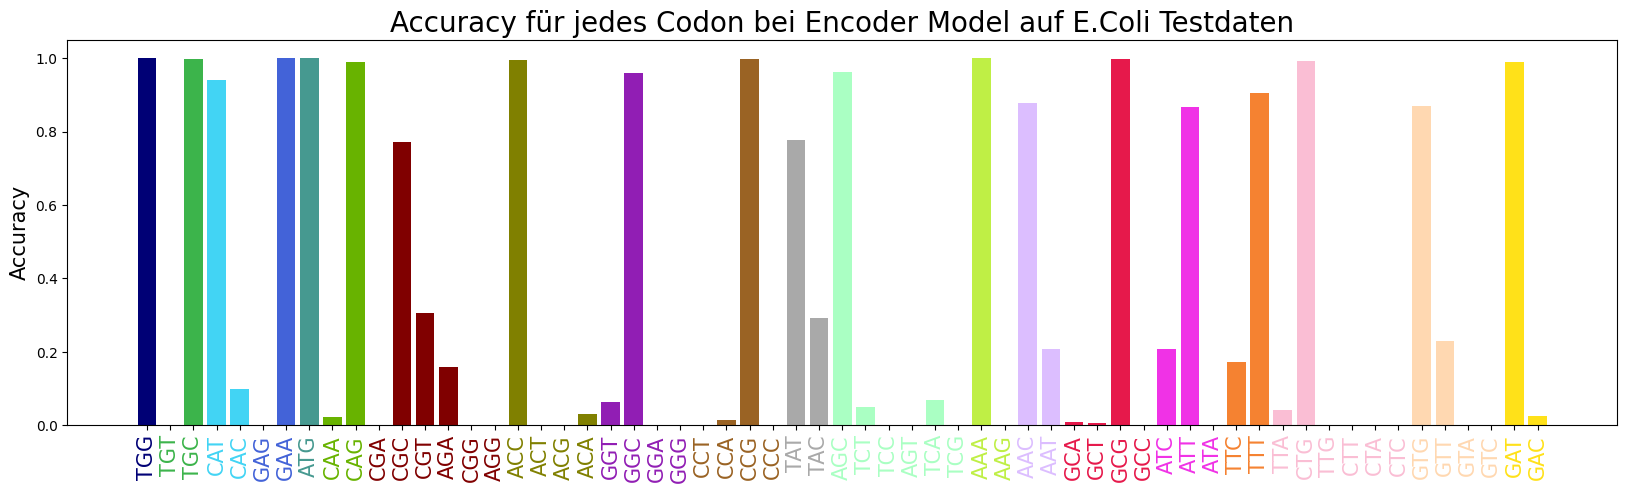

In [13]:
plt = mle.plot_codon_acc(labels_int, predicted_int, f'Accuracy für jedes Codon bei Encoder Model auf {organism_name} Testdaten')

In [14]:
usage_biases_codons = {}
codon_to_aa = mle.dict_aa_codon()
for codon in labels:
    aa = codon_to_aa[codon]
    usage_biases_codons[codon] = e.usage_biases[aa][codon]

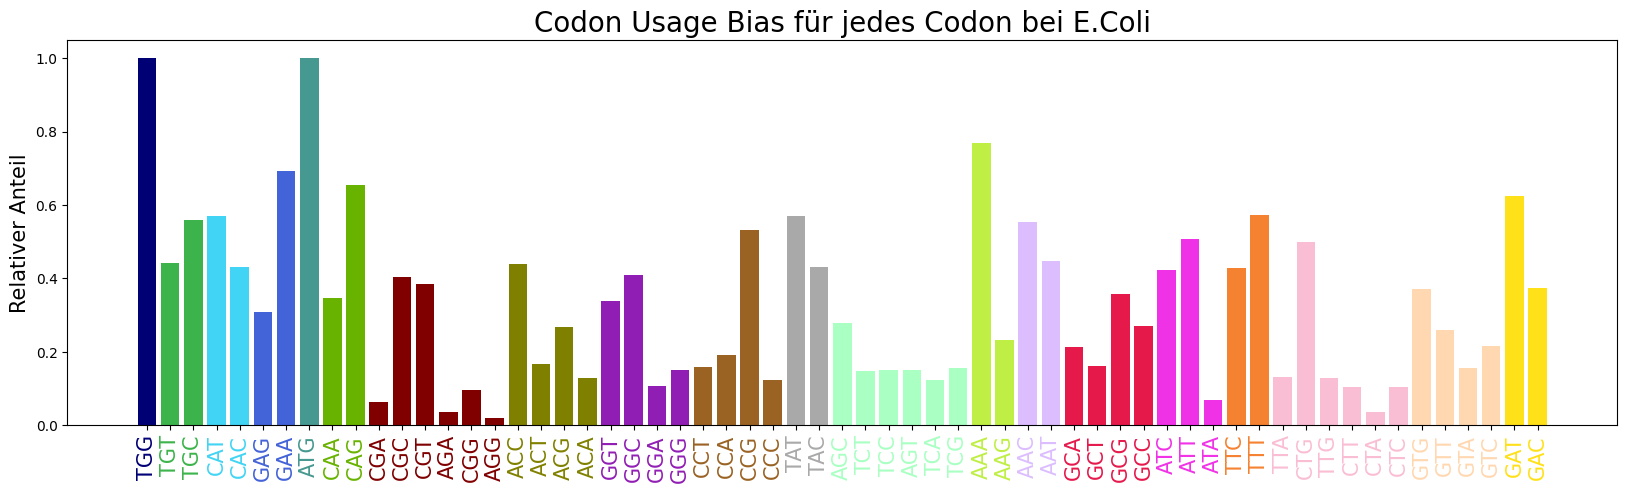

In [15]:
_, _ = mle.plot_cub(usage_biases_codons, f"Codon Usage Bias für jedes Codon bei {organism_name}")

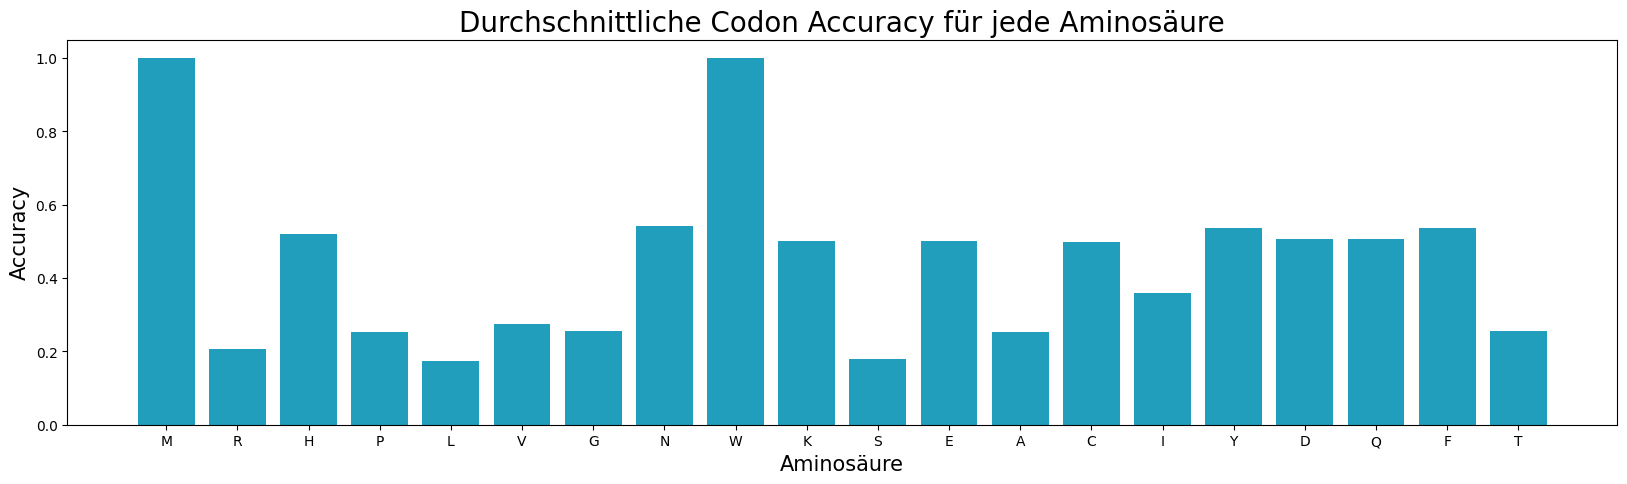

In [16]:
mle.plot_avg_aa_acc(labels_int, predicted_int).show()

#### Comparison Max CUB

In [17]:
pn_dict = mle.create_pn_dict(predicted, labels, organism)

In [18]:
cub_test_data = {}

for codon in pn_dict:
    aa = mlh.codon_to_amino_acid[codon]
    aa_codons = mlh.amino_acids_to_codons.get(aa, [])
    aa_sum = sum(pn_dict[c]['num'] for c in aa_codons)
    cub_test_data[codon] = pn_dict[codon]['num'] / aa_sum

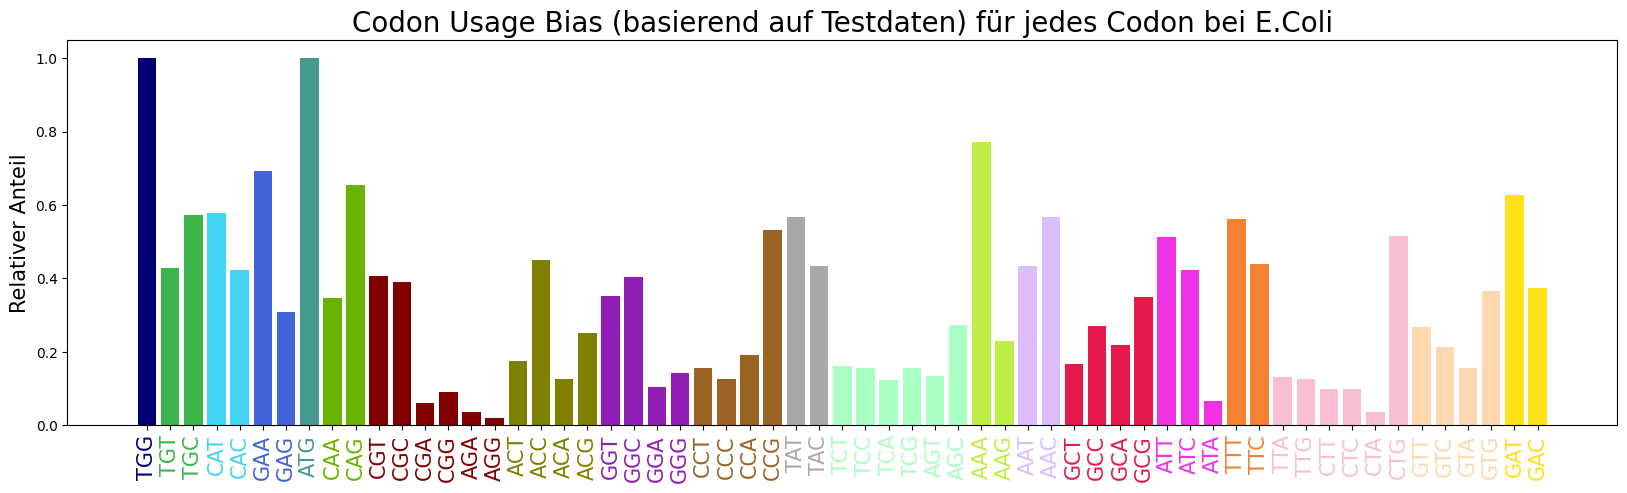

In [19]:
_, keys = mle.plot_cub(cub_test_data, f"Codon Usage Bias (basierend auf Testdaten) für jedes Codon bei {organism_name}")

In [20]:
pn_dict = { codon : pn_dict[codon] for codon in keys if codon in pn_dict}

<module 'matplotlib.pyplot' from '/home/mkuehn/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

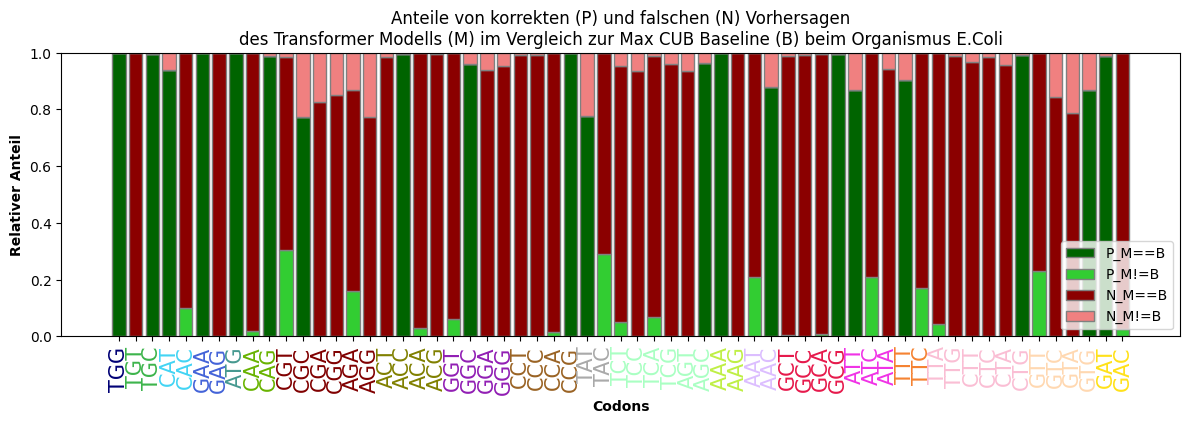

In [21]:
mle.plot_pn_dict(pn_dict, 'Transformer', organism_name)